# Data Mining project 


In [1]:
NAME = "Cathelijne de Bruijn"
STUDENT_NUMBER = "S1080330"
COLLABORATOR_NAME = "Thomas Verheijen"
COLLABORATOR_STUDENT_NUMBER = "S1087174"

## 3 Data pre-processing

**In this part, the pre-processing of the Boston housing dataset is covered.** 

**3.1**) In this subsection, the used libararies for the pre-processing are inserted and the dataset is loaded into the code.


In [25]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston()

print(boston_dataset.keys())

X = boston_dataset['data']
y = boston_dataset['target']

print(X.shape)
print(y.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
(506,)


**3.2**) In this subsection, the distribution of the target feature MEDV is shown using a histogram.

C:\Users\Thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


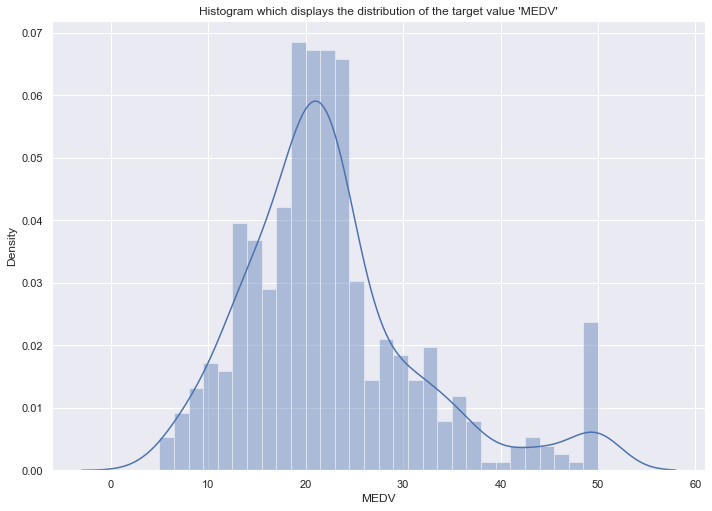

In [26]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.title("Histogram which displays the distribution of the target value 'MEDV'")
plt.show()

**3.3**) In this subsection, the dataset will be checked to make sure the dataset doesn't contain any missing values visualised to detect outliers and remove them, 

In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**3.4**) In this subsection, the correlations between the data attributes and the target attribute will be visualised using a correlation matrix.

<AxesSubplot:title={'center':'Correlation matrix Boston dataset'}>

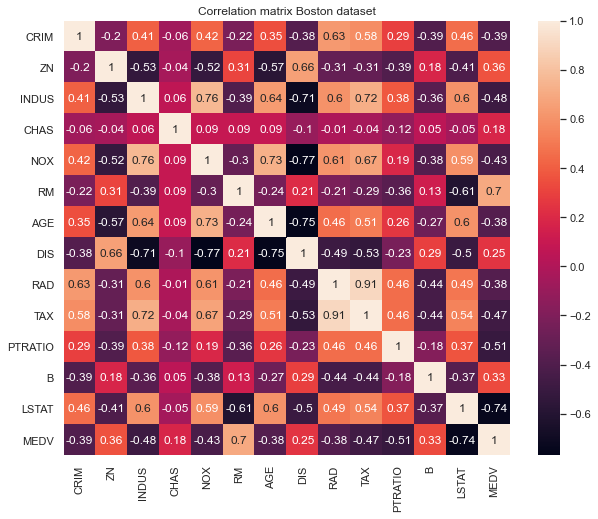

In [27]:
plt.figure(figsize=(10,8))
plt.title("Correlation matrix Boston dataset")
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From the above correlation matrix, we can see that RM and LSTAT have a strong correlation with the ouput attribute MEDV, while RM and LSTAT have no strong correlation with each other, which is good, because there is no case of co-linearity.

**3.5**) In this subsection, a scatterplot is made from the attributes LSTAT and RM with the target attribute MEDV. The scatterplots visualize the linear relation between the two attributes and the target attribute.

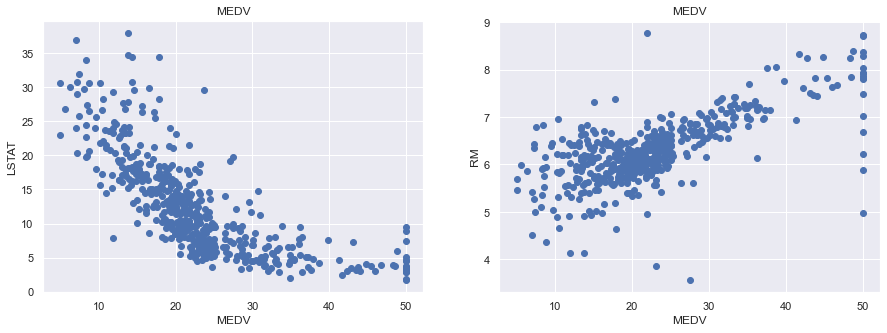

In [28]:
plt.figure(figsize=(15, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    y = boston[col]
    x = target
    plt.scatter(x, y, marker='o')
    plt.title("MEDV")
    plt.xlabel('MEDV')
    plt.ylabel(col)

**3.6**)In this subsection, we remove the outliers at MEDVD=50 that are seen in the scatterplots at 3.5 and histogram at 3.2. 

In [34]:
y=np.array(boston['MEDV'])
X=np.column_stack((boston['RM'],boston['LSTAT']))
boston_npdata = np.column_stack((X, y))

boston_filtered = np.delete(boston_npdata, np.where(
    boston_npdata[:, 2] >= 45), axis=0)
#print(boston_filtered.shape)


X= np.array(boston_filtered[:,0:2])
y= np.array(boston_filtered[:,2])
print(X.shape)
print(y.shape)

(484, 2)
(484,)


**3.7**) In this subsection,new scatterplots are made with the filtered data of the boston dataset, with similar attributes as in subsection 3.5

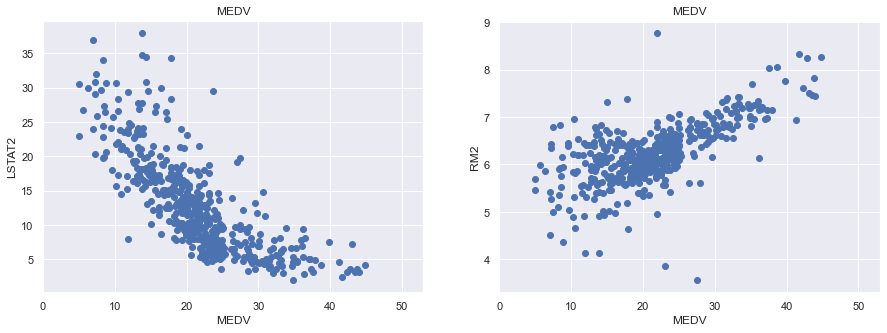

In [35]:
plt.figure(figsize=(15, 5))
num_rows, num_cols = X.shape
y= np.array(boston_filtered[:,2])
#print(y)
boston_filtered = {'RM2': np.zeros(484,), 'LSTAT2': np.zeros(484,), 'MEDV': np.zeros(484,)}
boston_filtered['RM2']=X[:,0]
boston_filtered['LSTAT2']=X[:,1]
boston_filtered['MEDV2']=y

features = ['LSTAT2', 'RM2']
target = boston_filtered['MEDV2']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    y = boston_filtered[col]
    x = target
    plt.scatter(x, y, marker='o')
    plt.xlim([0, 53])
    plt.title("MEDV")
    plt.xlabel('MEDV')
    plt.ylabel(col)

## 4 Using the data to optimize regression models.

**In this part, the training and testing of the linear regression and random forest models are covered.** 

**4.1**) In this subsection, the data set is split into a train and test set.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(338, 2)
(146, 2)
(338,)
(146,)


**4.2**) In this subsection, the linear regression model is trained on the input attributes.

[6.169 5.928 5.813 5.39  7.007 5.713 5.304 5.759 5.637 5.889 5.565 5.012
 5.874 6.279 5.627 7.079 7.412 6.871 6.312 5.924 5.854 5.803 6.382 6.63
 5.782 6.012 6.377 7.014 7.358 5.572 6.619 6.516 6.406 6.266 4.973 6.226
 5.884 5.683 6.086 5.531 6.23  6.301 6.167 6.442 5.682 6.041 5.786 6.951
 6.616 6.854 5.834 5.895 4.628 6.145 6.114 5.617 5.927 6.297 6.595 6.782
 6.718 5.599 6.678 5.957 6.389 5.966 6.115 5.898 6.398 6.565 6.009 6.083
 5.99  5.    5.878 7.327 6.642 5.926 6.163 5.594 5.818 6.164 5.836 7.147
 6.202 6.405 5.876 6.495 5.794 7.163 6.861 6.957 6.98  6.629 7.267 5.983
 5.757 6.211 6.51  6.023 6.485 6.421 5.85  5.731 5.879 5.877 6.833 5.783
 6.715 6.649 5.875 6.376 7.185 6.625 5.813 7.691 6.037 6.373 5.822 5.868
 6.874 5.403 6.103 5.79  6.897 6.348 7.333 6.425 6.63  7.52  6.129 6.153
 6.273 6.794 5.454 6.431 5.747 5.57  5.036 7.313 6.417 8.069 6.113 6.229
 5.56  5.885 6.121 6.254 5.362 6.461 6.03  7.61  5.88  6.167 5.896 6.027
 6.14  7.274 5.888 5.727 6.185 7.155 6.24  5.92  6.6

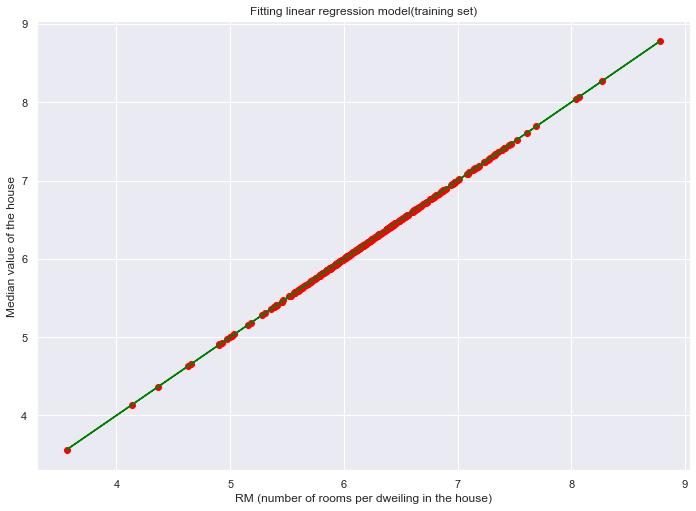

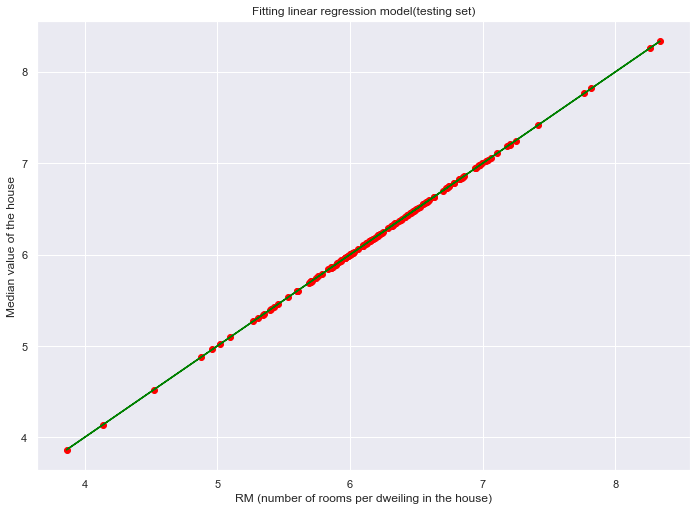

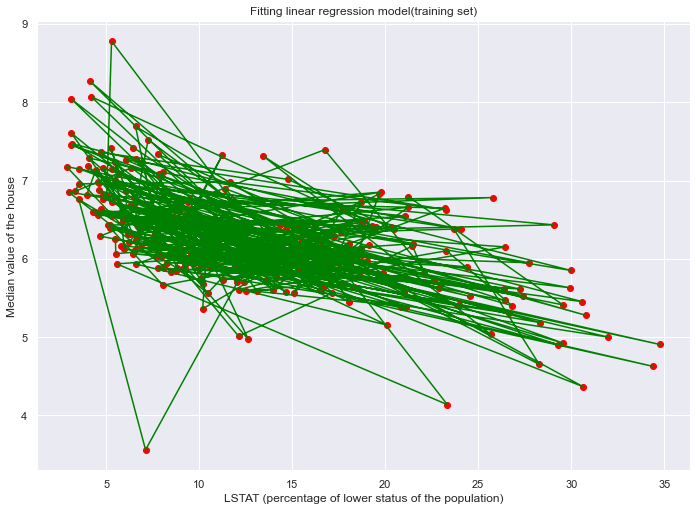

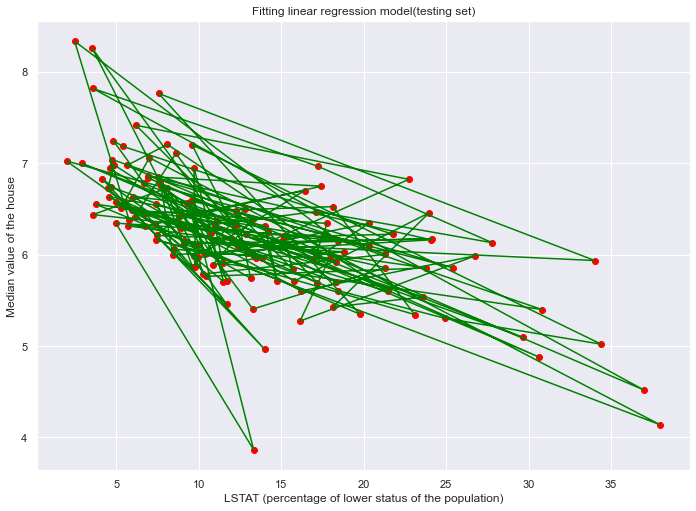

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


boston_linmodel = LinearRegression()
boston_linmodel.fit(X_train, y_train)
y_pred = boston_linmodel.predict(X_test)
print(y_train)
print(X_train[:,0])

plt.scatter(X_train[:,0], y_train, color = "red")
plt.plot(X_train[:,0], boston_linmodel.predict(X_train), color = "green")
plt.title("Fitting linear regression model(training set)")
plt.xlabel("RM (number of rooms per dweiling in the house)")
plt.ylabel("Median value of the house")
plt.show()

plt.scatter(X_test[:,0], y_test, color = "red")
plt.plot(X_test[:,0], boston_linmodel.predict(X_test), color = "green")
plt.title("Fitting linear regression model(testing set)")
plt.xlabel("RM (number of rooms per dweiling in the house)")
plt.ylabel("Median value of the house")
plt.show()

plt.scatter(X_train[:,1], y_train, color = "red")
plt.plot(X_train[:,1], boston_linmodel.predict(X_train), color = "green")
plt.title("Fitting linear regression model(training set)")
plt.xlabel("LSTAT (percentage of lower status of the population)")
plt.ylabel("Median value of the house")
plt.show()

plt.scatter(X_test[:,1], y_test, color = "red")
plt.plot(X_test[:,1], boston_linmodel.predict(X_test), color = "green")
plt.title("Fitting linear regression model(testing set)")
plt.xlabel("LSTAT (percentage of lower status of the population)")
plt.ylabel("Median value of the house")
plt.show()


**4.2**) In this subsection, the linear regression model is evaluated.

In [19]:
from sklearn.metrics import r2_score

y_train_predict = boston_linmodel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = boston_linmodel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.2307340469591663e-15
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 1.1880971072374322e-15
R2 score is 1.0


**4.3**) In this subsection, the random forest regression model is used and evaluated.

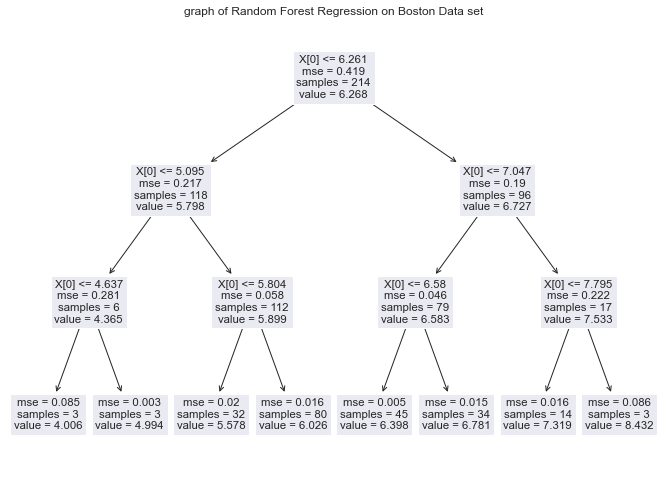

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree

#X_train, y_train = make_regression(n_features=2, n_informative=2,
                       #random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, y_train)

tree.plot_tree(regr.estimators_[0])
plt.title('graph of Random Forest Regression on Boston Data set')
plt.show()

In [21]:
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set of the random forest model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set of the random forest model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set of the random forest model
--------------------------------------
RMSE is 0.07467295637982053
R2 score is 0.9853252455035855


The model performance for testing set of the random forest model
--------------------------------------
RMSE is 0.07515795262099725
R2 score is 0.986742255834608


**4.4**) In this subsection, the ideal desicion tree dept of the random forest regression model is determined by displaying a graph showing the error on the train and test data as a function of tree depth.

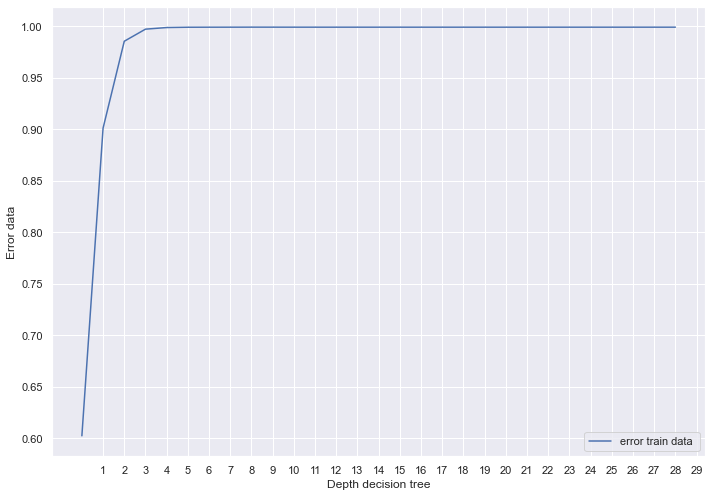

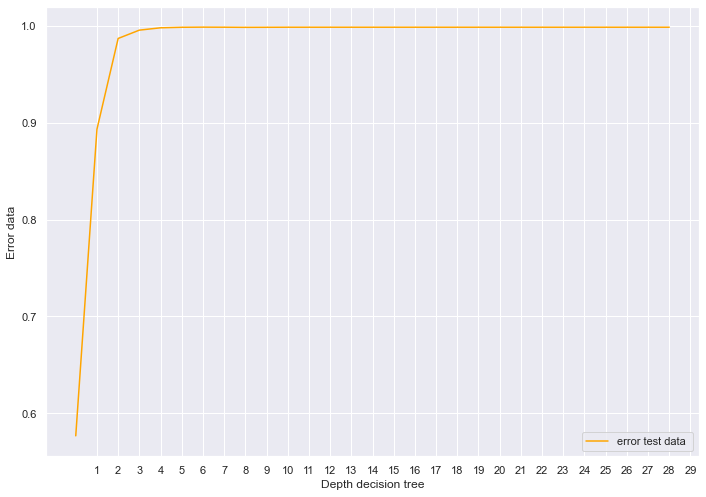

In [24]:
regression_error_train=np.zeros(29)
regression_error_test=np.zeros(29)

for d in range(1,30):
    #X_train, y_train = make_regression(n_features=2, n_informative=2,
                       #random_state=0, shuffle=False)
    regr = RandomForestRegressor(max_depth=d, random_state=0)
    regr.fit(X_train, y_train)
    
    y_train_predict = regr.predict(X_train)
    y_test_predict = regr.predict(X_test)
    score_train= regr.score(X_train, y_train, sample_weight=None)
    score_test= regr.score(X_test, y_test, sample_weight=None)
    #r2_train = r2_score(y_train, y_train_predict)
    #r2_test = r2_score(y_test, y_test_predict)
    
    regression_error_train[d-1]=score_train
    regression_error_test[d-1]=score_test
    
plt.plot(regression_error_train, label = 'error train data ')

plt.xlabel('Depth decision tree')
plt.ylabel('Error data')
plt.legend()
plt.xticks(np.arange(1, 30, step=1))   
plt.show()    

plt.plot(regression_error_test, label = 'error test data ',color='orange')
plt.xlabel('Depth decision tree')
plt.ylabel('Error data')
plt.legend()
plt.xticks(np.arange(1, 30, step=1))   
plt.show()  
    